In [1]:
import pandas as pd
import pyfolio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
import datetime as date
import cufflinks as cf
import plotly as py
from pandas_datareader import data as pdr
from pandas_profiling import ProfileReport
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

C:\Users\pavit\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
def get_Data(index):
    data = pdr.get_data_yahoo(index, start=startdate, end=enddate)
    return data

startdate = date.datetime(2018, 3, 8)
enddate = date.datetime(2021, 3, 8)


In [3]:
amxl = get_Data('AMXL.MX')
ac = get_Data('AC.MX')
teakcpo = get_Data('TEAKCPO.MX')
gcarso = get_Data('GCARSOA1.MX')
alpeka = get_Data('ALPEKA.MX')
volara = get_Data('VOLARA.MX')
gfinburo = get_Data('GFINBURO.MX')
kimbera = get_Data('KIMBERA.MX')
herdez = get_Data('HERDEZ.MX')

ipc = get_Data('^MXX')


In [4]:
for stock in (amxl,ac,teakcpo,gcarso,alpeka,volara,gfinburo,kimbera,herdez):
    stock['Returns'] = stock['Adj Close'] / stock['Adj Close'].iloc[0]

amxl.head()

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2018-03-08,17.700001,17.400000,17.559999,17.639999,40733541.0,16.198400,1.000000
2018-03-09,17.930000,17.559999,17.660000,17.879999,36449223.0,16.418785,1.013605
2018-03-12,17.980000,17.770000,17.930000,17.840000,32385574.0,16.382055,1.011338
2018-03-13,18.150000,17.860001,17.870001,18.090000,58067015.0,16.611624,1.025510
2018-03-14,18.160000,17.870001,18.160000,17.980000,34015756.0,16.510611,1.019274


In [5]:
for stock, allocation in zip((amxl,ac,teakcpo,gcarso,alpeka,volara,gfinburo,kimbera,herdez),[1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9]):
    stock['Allocation'] = stock['Returns'] * allocation

amxl.head()

,High,Low,Open,Close,Volume,Adj Close,Returns,Allocation
Date,,,,,,,,
2018-03-08,17.700001,17.400000,17.559999,17.639999,40733541.0,16.198400,1.000000,0.111111
2018-03-09,17.930000,17.559999,17.660000,17.879999,36449223.0,16.418785,1.013605,0.112623
2018-03-12,17.980000,17.770000,17.930000,17.840000,32385574.0,16.382055,1.011338,0.112371
2018-03-13,18.150000,17.860001,17.870001,18.090000,58067015.0,16.611624,1.025510,0.113946
2018-03-14,18.160000,17.870001,18.160000,17.980000,34015756.0,16.510611,1.019274,0.113253


In [6]:
for stock in (amxl,ac,teakcpo,gcarso,alpeka,volara,gfinburo,kimbera,herdez):
    stock['Position'] = stock['Allocation'] * 1000

amxl.head()

,High,Low,Open,Close,Volume,Adj Close,Returns,Allocation,Position
Date,,,,,,,,,
2018-03-08,17.700001,17.400000,17.559999,17.639999,40733541.0,16.198400,1.000000,0.111111,111.111111
2018-03-09,17.930000,17.559999,17.660000,17.879999,36449223.0,16.418785,1.013605,0.112623,112.622815
2018-03-12,17.980000,17.770000,17.930000,17.840000,32385574.0,16.382055,1.011338,0.112371,112.370871
2018-03-13,18.150000,17.860001,17.870001,18.090000,58067015.0,16.611624,1.025510,0.113946,113.945570
2018-03-14,18.160000,17.870001,18.160000,17.980000,34015756.0,16.510611,1.019274,0.113253,113.252681


In [7]:
portafolio = pd.concat([amxl['Position'],ac['Position'],teakcpo['Position'],gcarso['Position'],alpeka['Position'],
                        volara['Position'],gfinburo['Position'],kimbera['Position'],herdez['Position']], axis=1)
portafolio.columns = ['AMXL.MX','AC.MX','TEAKCPO.MX','GCARSOA1.MX','ALPEKA.MX','VOLARA.MX','GFINBURO.MX','KIMBERA.MX','HERDEZ.MX']
portafolio.head()


,AMXL.MX,AC.MX,TEAKCPO.MX,GCARSOA1.MX,ALPEKA.MX,VOLARA.MX,GFINBURO.MX,KIMBERA.MX,HERDEZ.MX
Date,,,,,,,,,
2018-03-08,111.111111,111.111111,111.111111,111.111111,111.111111,111.111111,111.111111,111.111111,111.111111
2018-03-09,112.622815,111.793020,108.358230,114.230379,111.463719,114.205917,113.869831,114.067951,116.315369
2018-03-12,112.370871,112.142522,108.358230,118.086606,111.463719,116.696858,116.084063,115.710656,115.014297
2018-03-13,113.945570,112.304478,108.943953,115.395816,111.155187,118.131034,116.338152,115.349258,112.932602
2018-03-14,113.252681,112.457898,108.943953,112.962098,110.890748,115.640092,115.031397,115.644923,109.999281


In [8]:
portafolio_total = portafolio.sum(axis=1)
portafolio_total.head()

Date
2018-03-08    1000.000000
2018-03-09    1016.927229
2018-03-12    1025.927820
2018-03-13    1024.496048
2018-03-14    1014.823071
dtype: float64

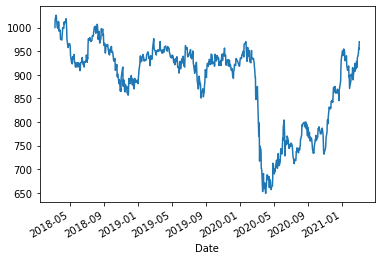

In [9]:
portafolio_total.plot()
plt.show()

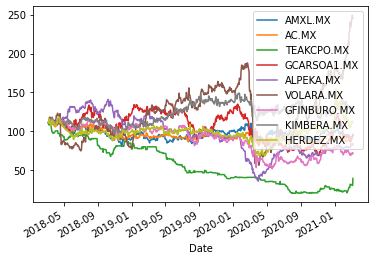

In [10]:
portafolio.plot()
plt.show()

In [28]:
portafolio_returns = portafolio_total.pct_change().dropna()
portafolio_returns.head()

Date
2018-03-09    0.016927
2018-03-12    0.008851
2018-03-13   -0.001396
2018-03-14   -0.009442
2018-03-15   -0.003727
dtype: float64

In [29]:
benchmark = ipc['Adj Close']
benchmark.head()
bench = benchmark.pct_change().dropna()
bench.rename('Benchmark IPC')
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

pyfolio.create_returns_tear_sheet(portafolio_returns)

Start date,2018-03-09
End date,2021-03-05
Total months,35
,Backtest
Annual return,-1.0%
Cumulative returns,-3.0%
Annual volatility,20.2%
Sharpe ratio,0.05
Calmar ratio,-0.03
Stability,0.36
Max drawdown,-36.8%


IndexError: index -1 is out of bounds for axis 0 with size 0

In [30]:
import numpy as np
rets = np.log(portafolio / portafolio.shift(1)).dropna()
print(rets.head())

             AMXL.MX     AC.MX  TEAKCPO.MX  GCARSOA1.MX  ALPEKA.MX  VOLARA.MX  \
Date                                                                            
2018-03-09  0.013514  0.006118   -0.025088     0.027687   0.003168   0.027472   
2018-03-12 -0.002240  0.003121    0.000000     0.033201   0.000000   0.021577   
2018-03-13  0.013916  0.001443    0.005391    -0.023050  -0.002772   0.012215   
2018-03-14 -0.006099  0.001365    0.000000    -0.021316  -0.002382  -0.021312   
2018-03-15  0.001667 -0.006845    0.000000    -0.003191   0.000397  -0.004580   

            GFINBURO.MX  KIMBERA.MX  HERDEZ.MX  
Date                                            
2018-03-09     0.024525    0.026264   0.045774  
2018-03-12     0.019259    0.014298  -0.011249  
2018-03-13     0.002186   -0.003128  -0.018265  
2018-03-14    -0.011296    0.002560  -0.026317  
2018-03-15    -0.018793   -0.009706   0.008139  


In [31]:
mean = rets.mean() * 252
print(mean)

AMXL.MX       -0.047746
AC.MX         -0.061241
TEAKCPO.MX    -0.346235
GCARSOA1.MX   -0.053694
ALPEKA.MX     -0.092852
VOLARA.MX      0.266078
GFINBURO.MX   -0.145140
KIMBERA.MX     0.057744
HERDEZ.MX      0.004837
dtype: float64


In [32]:
covariance = rets.cov() *252
print(covariance)

              AMXL.MX     AC.MX  TEAKCPO.MX  GCARSOA1.MX  ALPEKA.MX  \
AMXL.MX      0.073176  0.017071    0.001783     0.043051   0.024715   
AC.MX        0.017071  0.048580    0.002089     0.029251   0.014475   
TEAKCPO.MX   0.001783  0.002089    0.139742    -0.004386   0.002138   
GCARSOA1.MX  0.043051  0.029251   -0.004386     0.167243   0.036324   
ALPEKA.MX    0.024715  0.014475    0.002138     0.036324   0.106242   
VOLARA.MX    0.041769  0.024206    0.003116     0.042872   0.049710   
GFINBURO.MX  0.044969  0.027768    0.001955     0.080655   0.033749   
KIMBERA.MX   0.024557  0.018445    0.000055     0.037427   0.015787   
HERDEZ.MX    0.033499  0.016499   -0.003265     0.052120   0.019577   

             VOLARA.MX  GFINBURO.MX  KIMBERA.MX  HERDEZ.MX  
AMXL.MX       0.041769     0.044969    0.024557   0.033499  
AC.MX         0.024206     0.027768    0.018445   0.016499  
TEAKCPO.MX    0.003116     0.001955    0.000055  -0.003265  
GCARSOA1.MX   0.042872     0.080655    0.0374

In [33]:
weights = np.random.random(9)
print(weights)
weights = weights / np.sum(weights)
print(weights.sum())

[0.80668144 0.54647807 0.8900082  0.04425703 0.31317088 0.21294153
 0.57323475 0.34690095 0.31291379]
0.9999999999999999


In [34]:
exp_ret = np.sum(rets.mean() * weights) *252
print(exp_ret)

-0.10294717780613927


In [35]:
exp_cov = np.dot(weights.T, np.dot(rets.cov() * 252, weights))
print(exp_cov)

0.03226615306669791


In [36]:
exp_std = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
print(exp_std)

0.1796278181872115


In [38]:
prets = []
pvols = []

for p in range(3000):
    weights = np.random.random(9)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) *252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))))

prets = np.array(prets)
pvols = np.array(pvols)

print(prets[:5])
print(pvols[:5])

[-0.02130424 -0.0577524   0.00619677 -0.05630775 -0.05317386]
[0.21497336 0.21507521 0.24158671 0.22386057 0.19145918]


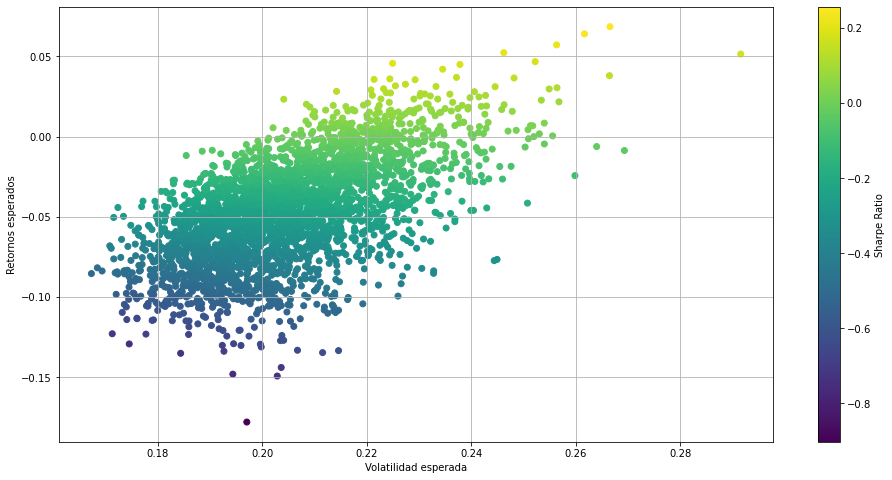

In [39]:
plt.figure(figsize=(16,8))
plt.scatter(pvols, prets, c=prets / pvols, marker = 'o')
plt.grid(True)
plt.xlabel('Volatilidad esperada')
plt.ylabel('Retornos esperados')
plt.colorbar(cmap ='plasma' , label = 'Sharpe Ratio')
plt.show()

In [40]:
def pstats(weights):
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) *252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret,pvol, pret/pvol])

import scipy.optimize as sco
def min_sharpe(weights):
    return -pstats(weights)[2]

In [41]:
cons = ({'type' :'eq', 'fun' : lambda x: np.sum(x) - 1 })
bnds = tuple((0,1) for x in range(9))

In [42]:
opts = sco.minimize(min_sharpe, 9 * [1. / 9], method = 'SLSQP', bounds = bnds, constraints = cons)
print(opts)

     fun: -0.5034993386511821
     jac: array([ 2.33191527e-01,  2.22899131e-01,  8.70053709e-01,  2.62810953e-01,
        3.54404241e-01,  2.98097730e-05,  4.97110009e-01, -6.70403242e-05,
        1.05614968e-01])
 message: 'Optimization terminated successfully'
    nfev: 81
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.00000000e+00, 2.46343830e-16, 0.00000000e+00, 2.97833284e-17,
       8.34853507e-17, 6.92162603e-01, 8.68815181e-17, 3.07837397e-01,
       9.51913776e-17])


In [43]:
sharpe_opt = pstats(opts['x']).round(3)
print(sharpe_opt)

[0.202 0.401 0.503]


In [44]:
def min_var(weights):
    return pstats(weights)[1] ** 2

In [45]:
optv = sco.minimize(min_var, 9 * [1. / 9], method = 'SLSQP', bounds = bnds, constraints = cons)
print(optv)

     fun: 0.02548305318235268
     jac: array([0.05112835, 0.05092169, 0.05122703, 0.05780107, 0.05072232,
       0.05564775, 0.05868009, 0.05109385, 0.0504163 ])
 message: 'Optimization terminated successfully'
    nfev: 111
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([1.43475998e-01, 3.54665487e-01, 1.76012927e-01, 0.00000000e+00,
       1.20783828e-01, 0.00000000e+00, 2.16840434e-18, 1.31555273e-01,
       7.35064862e-02])


In [46]:
var_opt = pstats(optv['x']).round(3)
print(var_opt)

[-0.093  0.16  -0.581]


In [47]:
cons = ({'type' :'eq', 'fun' : lambda x: pstats(x)[0] - tret },
        {'type' :'eq', 'fun' : lambda x: np.sum(x) - 1 })
        
bnds = tuple((0,1) for x in weights)

In [48]:
def min_func_portafolio(weights):
    return pstats(weights)[1]

In [49]:
trets = np.linspace(0.30,0.46,50)
tvols = []
for tret in trets:
    cons = ({'type' :'eq', 'fun' : lambda x: pstats(x)[0] - tret },
        {'type' :'eq', 'fun' : lambda x: np.sum(x) - 1 })
    res = sco.minimize(min_func_portafolio, 9 *[1. / 9], method='SLSQP', bounds = bnds, constraints = cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

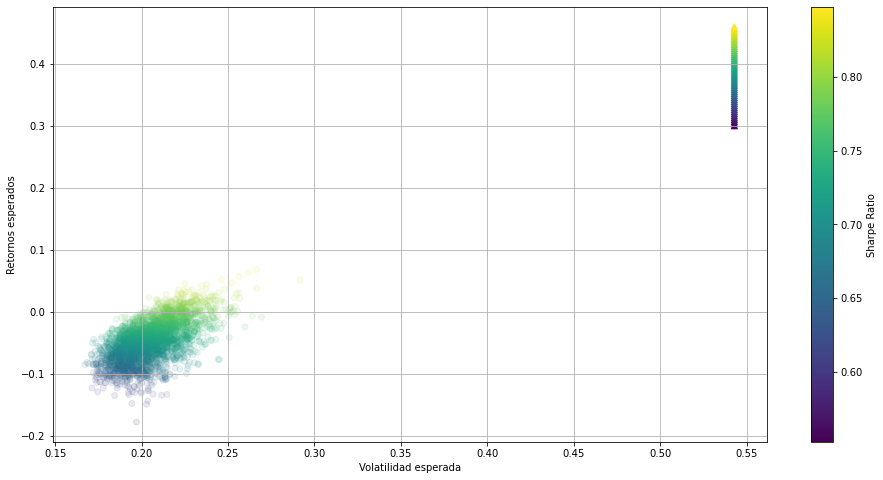

In [50]:
plt.figure(figsize=(16,8))
plt.scatter(pvols, prets, c=prets / pvols, marker = 'o', alpha = 0.1)
plt.scatter(tvols, trets, c=trets / tvols , marker = '^', edgecolors='face')
plt.grid(True)
plt.xlabel('Volatilidad esperada')
plt.ylabel('Retornos esperados')
plt.colorbar(cmap = 'inferno', label = 'Sharpe Ratio')
plt.show()

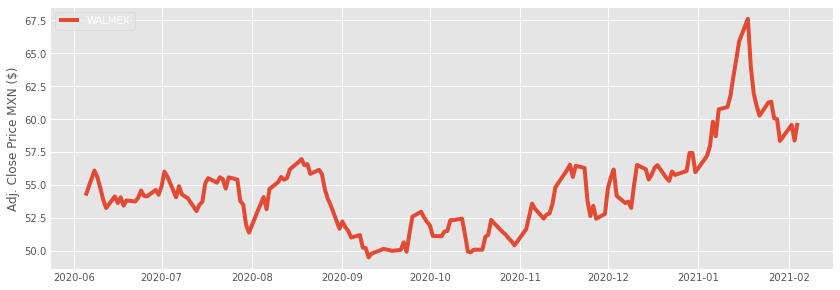

In [77]:
plt.figure(figsize=(12.5,4.5))
plt.plot(df['WALMEX.MX'],label='WALMEX')
plt.legend(loc='upper left')
plt.ylabel('Adj. Close Price MXN ($)')
plt.show;

In [70]:
SMA5=pd.DataFrame()
SMA5['Adj Close'] = df['WALMEX.MX'].rolling(window=5).mean()


In [71]:
SMA20=pd.DataFrame()
SMA20['Adj Close'] = df['WALMEX.MX'].rolling(window=20).mean()


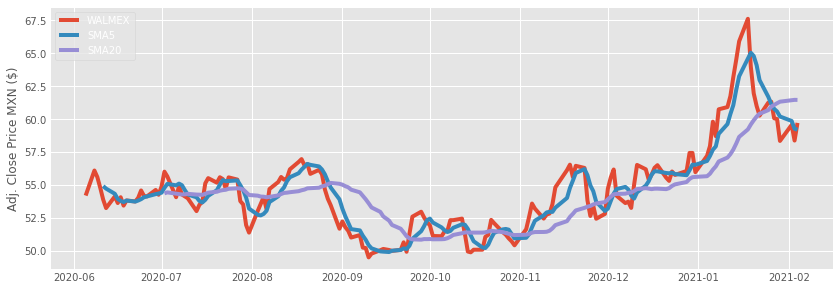

In [78]:
plt.figure(figsize=(12.5,4.5))
plt.plot(df['WALMEX.MX'],label='WALMEX')
plt.plot(SMA5['Adj Close'],label='SMA5')
plt.plot(SMA20['Adj Close'],label='SMA20')
plt.legend(loc='upper left')
plt.ylabel('Adj. Close Price MXN ($)')
plt.show;

In [79]:
data=pd.DataFrame()
data['WALMEX.MX']=df['WALMEX.MX']
data['SMA5']=SMA5['Adj Close']
data['SMA20']=SMA20['Adj Close']

In [80]:
data.head()

,WALMEX.MX,SMA5,SMA20
Date,,,
2020-06-05,54.205437,NaN,NaN
2020-06-08,56.104973,NaN,NaN
2020-06-09,55.605610,NaN,NaN
2020-06-10,54.792923,NaN,NaN
2020-06-11,53.901897,54.922168,NaN


In [81]:
def buy_sell(data,column=None):
    sigPriceBuy=[]
    sigPriceSell=[]
    flag=-1
    
    for i in range(len(data)):
        if data['SMA5'][i] > data['SMA20'][i]:
            if flag != 1:
                sigPriceBuy.append(data[column][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA5'][i] < data['SMA20'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data[column][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else: 
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    
    return (sigPriceBuy, sigPriceSell)
            

In [82]:
buy_sell=buy_sell(data,column='WALMEX.MX')
data['Buy_Signal_Price']=buy_sell[0]
data['Sell_Signal_Price']=buy_sell[1]
data

,WALMEX.MX,SMA5,SMA20,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2020-06-05,54.205437,NaN,NaN,NaN,NaN
2020-06-08,56.104973,NaN,NaN,NaN,NaN
2020-06-09,55.605610,NaN,NaN,NaN,NaN
2020-06-10,54.792923,NaN,NaN,NaN,NaN
2020-06-11,53.901897,54.922168,NaN,NaN,NaN
...,...,...,...,...,...
2021-01-28,60.009998,60.588000,61.2110,NaN,NaN
2021-01-29,58.349998,60.203999,61.3295,NaN,NaN
2021-02-02,59.570000,59.866000,61.4470,NaN,NaN


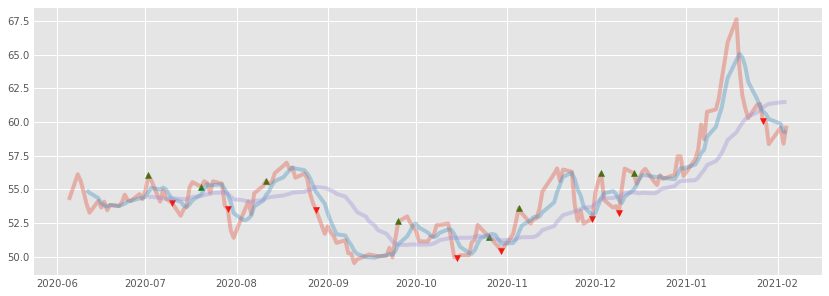

In [84]:
plt.figure(figsize=(12.6,4.6))
plt.plot(data['WALMEX.MX'],label='WALMEX',alpha=0.35)
plt.plot(data['SMA5'],label='SMA5',alpha=0.35)
plt.plot(data['SMA20'],label='SMA20',alpha=0.35)
plt.scatter(data.index,data['Buy_Signal_Price'],label='Buy',marker='^',color='green')
plt.scatter(data.index,data['Sell_Signal_Price'],label='Sell',marker='v',color='red')
plt.show();

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [85]:
df2=df['WALMEX.MX']
df2=pd.DataFrame(df2)
df2.columns=['Close_Price']


future_days = 25
df2['Prediction']=df2['Close_Price'].shift(-future_days)
df2.tail()

,Close_Price,Prediction
Date,,
2021-01-28,60.009998,NaN
2021-01-29,58.349998,NaN
2021-02-02,59.570000,NaN
2021-02-03,58.380001,NaN
2021-02-04,59.720001,NaN


In [86]:
X=np.array(df2.drop(['Prediction'],1))[:-future_days]
y=np.array(df2['Prediction'])[:-future_days]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

tree=DecisionTreeRegressor().fit(X_train,y_train)

lr=LinearRegression().fit(X_train,y_train)

In [88]:
x_future = df2.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[53.84234619],
       [52.65224075],
       [53.42580795],
       [52.44397354],
       [52.81092072],
       [54.72500992],
       [55.57791901],
       [56.18288803],
       [54.18946075],
       [53.63407898],
       [53.74317169],
       [53.26712799],
       [55.04236984],
       [56.53000259],
       [56.20000076],
       [55.41999817],
       [55.77999878],
       [56.31000137],
       [56.50999832],
       [55.56000137],
       [55.31999969],
       [56.02999878],
       [55.77000046],
       [56.06999969],
       [57.43999863]])

In [89]:
tree_predict = tree.predict(x_future)
print(tree_predict)
print()

lr_predict = lr.predict(x_future)
print(lr_predict)
print()

[55.58483887 55.97999954 51.11758423 57.95999908 59.81000137 53.96127701
 60.75       60.91999817 61.75       63.18999863 55.41756439 65.91000366
 67.62000275 63.99000168 61.95999908 61.         52.1999588  61.25999832
 61.33000183 60.75       60.00999832 53.16425323 52.1999588  58.38000107
 59.72000122]

[54.77057674 53.94817908 54.48273664 53.80426034 54.05783157 55.3805232
 55.96990833 56.38795962 55.01044306 54.62665801 54.70204426 54.37308414
 55.59982819 56.62782593 56.39978502 55.86078041 56.10955136 56.47579865
 56.6140024  55.95752672 55.79167854 56.28230867 56.10264223 56.30995047
 57.25665981]



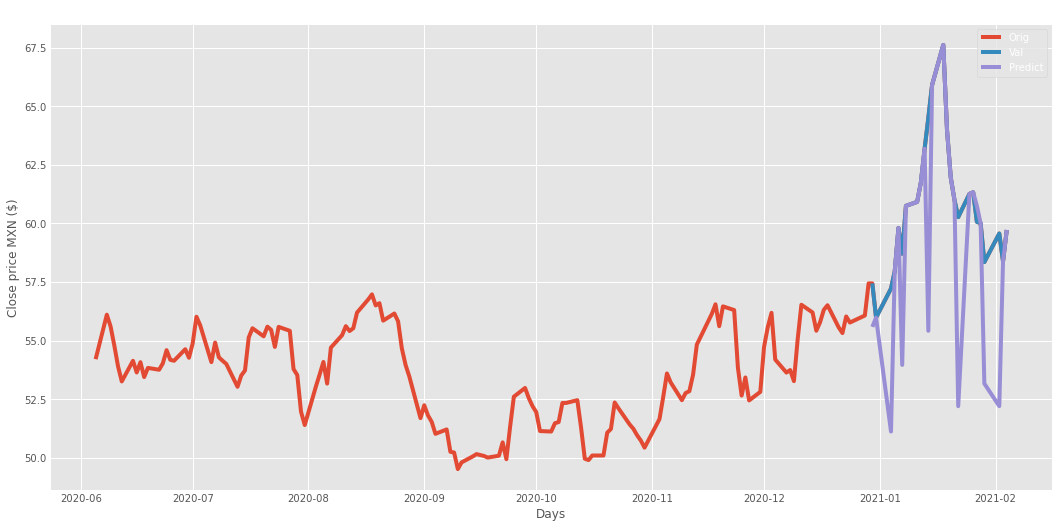

In [90]:
predictions = tree_predict

valid = df2[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price MXN ($)')
plt.plot(df2['Close_Price'])
plt.plot(valid[['Close_Price','Predictions']])
plt.legend(['Orig','Val','Predict'])
plt.show()

<AxesSubplot:xlabel='Date'>

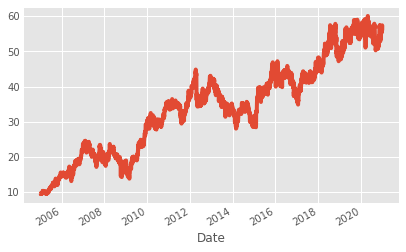

In [91]:
from pandas_datareader import data as pdr
import datetime as date
enddate = date.datetime(2021,1,1)
startdate = date.datetime(2005,1,1)

df = pdr.get_data_yahoo('WALMEX.MX',start = startdate, end = enddate)['Close']
df.plot()

In [92]:
last_year = np.log(df[-252:])
sigma = last_year.pct_change().std()*(252**0.5)
mu=(last_year[-1:].values / last_year[:1].values) - 1


In [93]:
window = 20
T = 1.0
last_price = df[-1:]

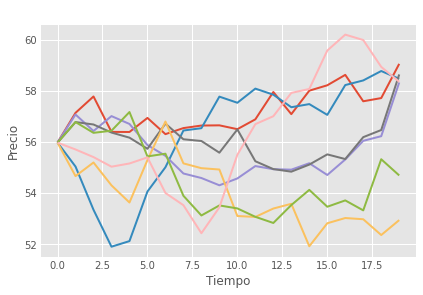

In [94]:
import scipy as sp

sp.random.seed(10)
paths = 7
dt = T / window
S = sp.zeros([window],dtype=float)
x = range(0,int(window),1)

df_1 = pd.DataFrame()

fig = plt.figure()
axis = fig.add_subplot(111)
for j in range(0,paths):
    S[0] = last_price
    for i in x[:-1]:
        e = sp.random.normal()
        S[i+1] = S[i] + S[i]*(mu-0.5*pow(sigma,2))*dt+sigma*S[i]*sp.sqrt(dt)*e
    df_1[j] = S
    plt.plot(x, S, lw=2)

plt.title('Caminos con Movimiento Browniano')
axis.set_xlabel('Tiempo')
axis.set_ylabel('Precio')
axis.grid(True)
plt.show()

In [95]:
df2 = pd.concat([df,df_1],axis = 0)
df2 = df2.reset_index()
df2 = df2.drop(['index'],axis=1)
df2.head()

,0,1,2,3,4,5,6
0,9.5600,NaN,NaN,NaN,NaN,NaN,NaN
1,9.5650,NaN,NaN,NaN,NaN,NaN,NaN
2,9.5200,NaN,NaN,NaN,NaN,NaN,NaN
3,9.5725,NaN,NaN,NaN,NaN,NaN,NaN
4,9.5125,NaN,NaN,NaN,NaN,NaN,NaN


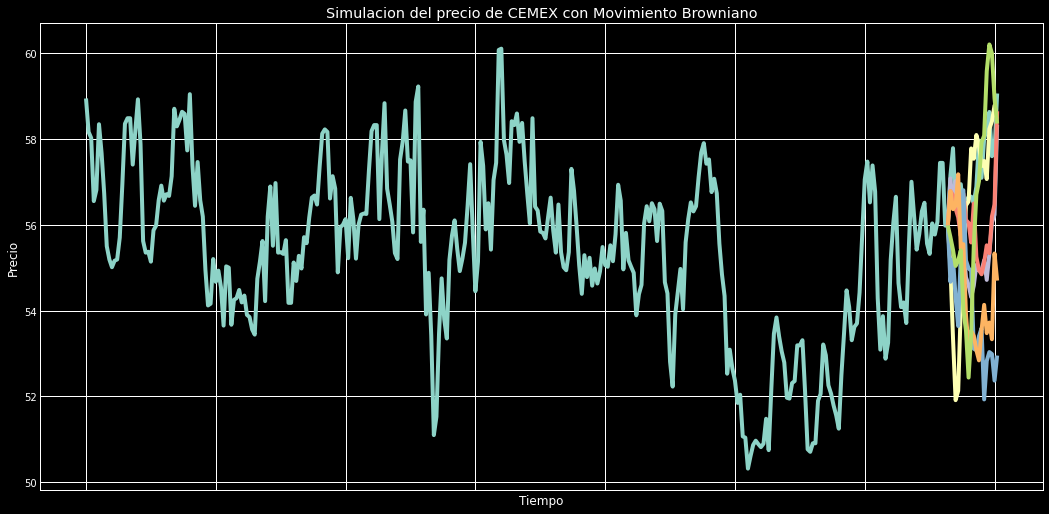

In [97]:
plt.style.use('dark_background')
df3 = df2[-352:]
fig2 = plt.figure(figsize = (16,8))
axis2 = fig2.add_subplot(111)
plt.plot(df3)
plt.title('Simulacion del precio de CEMEX con Movimiento Browniano')
axis2.set_xlabel('Tiempo')
axis2.set_ylabel('Precio')
axis2.grid(True)
plt.tick_params(
    axis = 'x',
    which = 'both',
    bottom = False,
    top = False,
    labelbottom = False)
plt.show()

In [114]:
import pandas as pd
from pandas_datareader import data as pdr
import datetime as date
import matplotlib.pyplot as plt
import pyfolio
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [102]:
def get_Data(index):
    data = pdr.get_data_yahoo(index, start=startdate, end=enddate)
    return data

startdate = date.datetime(2020, 7, 1)
enddate = date.datetime(2021, 2, 8)



In [106]:
walmex = get_Data('WALMEX.MX')
herdez = get_Data('HERDEZ.MX')
gmexico = get_Data('GMEXICOB.MX')
lala = get_Data('LALAB.MX')
lala.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-01,12.26,12.00,12.18,12.03,111271.0,11.763148
2020-07-02,12.23,11.51,12.23,11.72,427989.0,11.460026
2020-07-03,11.92,11.51,11.51,11.80,193124.0,11.538251
2020-07-06,12.16,11.62,11.89,12.04,2193255.0,11.772926
2020-07-07,12.30,11.90,12.04,12.20,692657.0,11.929378


In [107]:
for stock in (walmex,herdez,gmexico,lala):
    stock['Returns'] = stock['Adj Close'] / stock['Adj Close'].iloc[0]

In [108]:
walmex.head()

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2020-07-01,56.020000,55.040001,55.040001,55.779999,6825473.0,54.886215,1.000000
2020-07-02,57.119999,55.200001,55.910000,56.930000,14200086.0,56.017788,1.020617
2020-07-03,56.889999,55.810001,56.590000,56.560001,1287001.0,55.653717,1.013984
2020-07-06,56.919998,54.860001,56.709999,54.959999,7292228.0,54.079353,0.985299
2020-07-07,56.299999,54.799999,54.950001,55.810001,9154727.0,54.915737,1.000538


In [109]:

for stock, allocation in zip((walmex,herdez,gmexico,lala),[.25,.25,.25,.25]):
    stock['Allocation'] = stock['Returns'] * allocation

walmex.head()

,High,Low,Open,Close,Volume,Adj Close,Returns,Allocation
Date,,,,,,,,
2020-07-01,56.020000,55.040001,55.040001,55.779999,6825473.0,54.886215,1.000000,0.250000
2020-07-02,57.119999,55.200001,55.910000,56.930000,14200086.0,56.017788,1.020617,0.255154
2020-07-03,56.889999,55.810001,56.590000,56.560001,1287001.0,55.653717,1.013984,0.253496
2020-07-06,56.919998,54.860001,56.709999,54.959999,7292228.0,54.079353,0.985299,0.246325
2020-07-07,56.299999,54.799999,54.950001,55.810001,9154727.0,54.915737,1.000538,0.250134


In [110]:
for stock in (walmex,herdez,gmexico,lala):
    stock['Position'] = stock['Allocation'] * 1000

walmex.head()

,High,Low,Open,Close,Volume,Adj Close,Returns,Allocation,Position
Date,,,,,,,,,
2020-07-01,56.020000,55.040001,55.040001,55.779999,6825473.0,54.886215,1.000000,0.250000,250.000000
2020-07-02,57.119999,55.200001,55.910000,56.930000,14200086.0,56.017788,1.020617,0.255154,255.154175
2020-07-03,56.889999,55.810001,56.590000,56.560001,1287001.0,55.653717,1.013984,0.253496,253.495877
2020-07-06,56.919998,54.860001,56.709999,54.959999,7292228.0,54.079353,0.985299,0.246325,246.324843
2020-07-07,56.299999,54.799999,54.950001,55.810001,9154727.0,54.915737,1.000538,0.250134,250.134469


In [111]:
portafolio = pd.concat([walmex['Position'],herdez['Position'],gmexico['Position'],lala['Position']], axis=1)
portafolio.columns = ['WALMEX','HERDEZ','GMEXICO','LALA']
portafolio.head()

,WALMEX,HERDEZ,GMEXICO,LALA
Date,,,,
2020-07-01,250.000000,250.000000,250.000000,250.000000
2020-07-02,255.154175,249.926402,256.961447,243.557794
2020-07-03,253.495877,249.411099,254.750705,245.220298
2020-07-06,246.324843,249.190218,257.243663,250.207810
2020-07-07,250.134469,246.540078,258.984020,253.532839


In [112]:
portafolio_total = portafolio.sum(axis=1)
portafolio_total.head()

Date
2020-07-01    1000.000000
2020-07-02    1005.599817
2020-07-03    1002.877979
2020-07-06    1002.966534
2020-07-07    1009.191406
dtype: float64

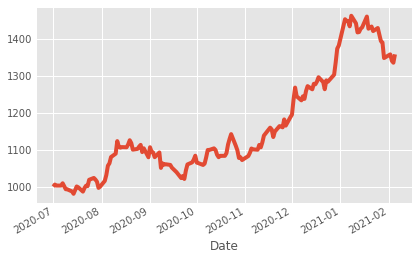

In [115]:

portafolio_total.plot()
plt.show()

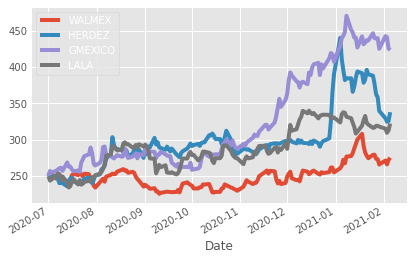

In [116]:
portafolio.plot()
plt.show()

In [117]:
portafolio_returns = portafolio_total.pct_change().dropna()
portafolio_returns.head()

Date
2020-07-02    0.005600
2020-07-03   -0.002707
2020-07-06    0.000088
2020-07-07    0.006206
2020-07-08   -0.008175
dtype: float64

In [149]:
benchmark = get_Data('^MXX')['Adj Close'].dropna()
bench = benchmark.pct_change().dropna()
bench.rename('Benchmark IPC')
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

pyfolio.create_returns_tear_sheet(portafolio_returns)

Start date,2020-07-02
End date,2021-02-05
Total months,7
,Backtest
Annual return,66.7%
Cumulative returns,35.8%
Annual volatility,21.3%
Sharpe ratio,2.51
Calmar ratio,7.16
Stability,0.81
Max drawdown,-9.3%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

In [51]:
import numpy as np
rets = np.log(portafolio / portafolio.shift(1)).dropna()
print(rets.head())

             AMXL.MX     AC.MX  TEAKCPO.MX  GCARSOA1.MX  ALPEKA.MX  VOLARA.MX  \
Date                                                                            
2018-03-09  0.013514  0.006118   -0.025088     0.027687   0.003168   0.027472   
2018-03-12 -0.002240  0.003121    0.000000     0.033201   0.000000   0.021577   
2018-03-13  0.013916  0.001443    0.005391    -0.023050  -0.002772   0.012215   
2018-03-14 -0.006099  0.001365    0.000000    -0.021316  -0.002382  -0.021312   
2018-03-15  0.001667 -0.006845    0.000000    -0.003191   0.000397  -0.004580   

            GFINBURO.MX  KIMBERA.MX  HERDEZ.MX  
Date                                            
2018-03-09     0.024525    0.026264   0.045774  
2018-03-12     0.019259    0.014298  -0.011249  
2018-03-13     0.002186   -0.003128  -0.018265  
2018-03-14    -0.011296    0.002560  -0.026317  
2018-03-15    -0.018793   -0.009706   0.008139  


In [52]:
mean = rets.mean() * 252
print(mean)

AMXL.MX       -0.047746
AC.MX         -0.061241
TEAKCPO.MX    -0.346235
GCARSOA1.MX   -0.053694
ALPEKA.MX     -0.092852
VOLARA.MX      0.266078
GFINBURO.MX   -0.145140
KIMBERA.MX     0.057744
HERDEZ.MX      0.004837
dtype: float64


In [53]:
covariance = rets.cov() *252
print(covariance)

              AMXL.MX     AC.MX  TEAKCPO.MX  GCARSOA1.MX  ALPEKA.MX  \
AMXL.MX      0.073176  0.017071    0.001783     0.043051   0.024715   
AC.MX        0.017071  0.048580    0.002089     0.029251   0.014475   
TEAKCPO.MX   0.001783  0.002089    0.139742    -0.004386   0.002138   
GCARSOA1.MX  0.043051  0.029251   -0.004386     0.167243   0.036324   
ALPEKA.MX    0.024715  0.014475    0.002138     0.036324   0.106242   
VOLARA.MX    0.041769  0.024206    0.003116     0.042872   0.049710   
GFINBURO.MX  0.044969  0.027768    0.001955     0.080655   0.033749   
KIMBERA.MX   0.024557  0.018445    0.000055     0.037427   0.015787   
HERDEZ.MX    0.033499  0.016499   -0.003265     0.052120   0.019577   

             VOLARA.MX  GFINBURO.MX  KIMBERA.MX  HERDEZ.MX  
AMXL.MX       0.041769     0.044969    0.024557   0.033499  
AC.MX         0.024206     0.027768    0.018445   0.016499  
TEAKCPO.MX    0.003116     0.001955    0.000055  -0.003265  
GCARSOA1.MX   0.042872     0.080655    0.0374

In [58]:
weights = np.random.random(9)
print(weights)
weights = weights / np.sum(weights)
print(weights.sum())

[0.08755354 0.39318536 0.63245401 0.60608172 0.48819745 0.21992743
 0.15701649 0.97176203 0.60966338]
0.9999999999999999


In [59]:
exp_ret = np.sum(rets.mean() * weights) *252
print(exp_ret)

-0.055287506246972117


In [60]:
exp_cov = np.dot(weights.T, np.dot(rets.cov() * 252, weights))
print(exp_cov)

0.03556393685268055


In [61]:
exp_std = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
print(exp_std)

0.18858403127698947


In [63]:

prets = []
pvols = []

for p in range(3000):
    weights = np.random.random(9)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) *252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))))

prets = np.array(prets)
pvols = np.array(pvols)

print(prets[:5])
print(pvols[:5])

[-0.05999937 -0.03176253 -0.03735802 -0.09661292 -0.0249828 ]
[0.18983101 0.21132814 0.22592075 0.20778979 0.21681075]


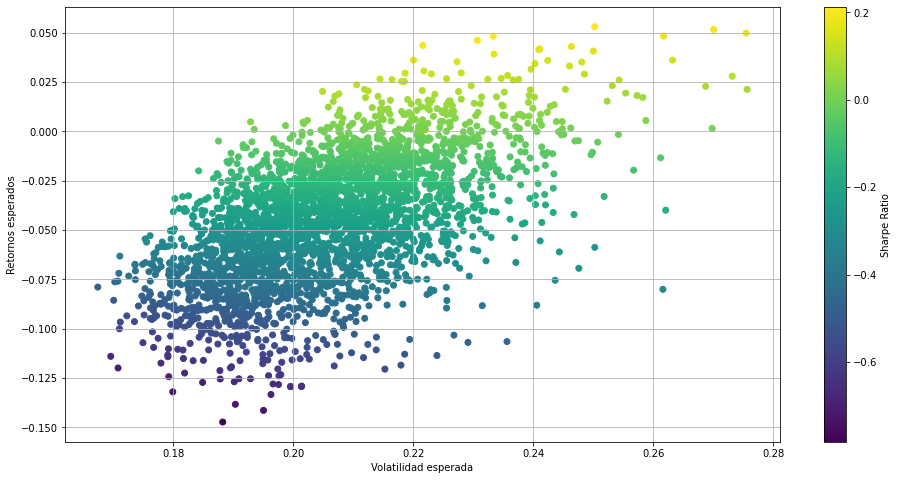

In [64]:

plt.figure(figsize=(16,8))
plt.scatter(pvols, prets, c=prets / pvols, marker = 'o')
plt.grid(True)
plt.xlabel('Volatilidad esperada')
plt.ylabel('Retornos esperados')
plt.colorbar(cmap ='plasma' , label = 'Sharpe Ratio')
plt.show()

In [65]:

def pstats(weights):
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) *252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret,pvol, pret/pvol])

In [66]:
import scipy.optimize as sco
def min_sharpe(weights):
    return -pstats(weights)[2]

In [67]:
cons = ({'type' :'eq', 'fun' : lambda x: np.sum(x) - 1 })
bnds = tuple((0,1) for x in range(9))

In [68]:

opts = sco.minimize(min_sharpe, 9 * [1. / 9], method = 'SLSQP', bounds = bnds, constraints = cons)

In [69]:
print(opts)

     fun: -0.5034993386511821
     jac: array([ 2.33191527e-01,  2.22899131e-01,  8.70053709e-01,  2.62810953e-01,
        3.54404241e-01,  2.98097730e-05,  4.97110009e-01, -6.70403242e-05,
        1.05614968e-01])
 message: 'Optimization terminated successfully'
    nfev: 81
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.00000000e+00, 2.46343830e-16, 0.00000000e+00, 2.97833284e-17,
       8.34853507e-17, 6.92162603e-01, 8.68815181e-17, 3.07837397e-01,
       9.51913776e-17])


In [70]:

sharpe_opt = pstats(opts['x']).round(3)
print(sharpe_opt)

[0.202 0.401 0.503]


In [71]:
def min_var(weights):
    return pstats(weights)[1] ** 2

In [72]:
optv = sco.minimize(min_var, 9 * [1. / 9], method = 'SLSQP', bounds = bnds, constraints = cons)
print(optv)
var_opt = pstats(optv['x']).round(3)
print(var_opt)

     fun: 0.02548305318235268
     jac: array([0.05112835, 0.05092169, 0.05122703, 0.05780107, 0.05072232,
       0.05564775, 0.05868009, 0.05109385, 0.0504163 ])
 message: 'Optimization terminated successfully'
    nfev: 111
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([1.43475998e-01, 3.54665487e-01, 1.76012927e-01, 0.00000000e+00,
       1.20783828e-01, 0.00000000e+00, 2.16840434e-18, 1.31555273e-01,
       7.35064862e-02])
[-0.093  0.16  -0.581]


In [73]:
cons = ({'type' :'eq', 'fun' : lambda x: pstats(x)[0] - tret },
        {'type' :'eq', 'fun' : lambda x: np.sum(x) - 1 })
        
bnds = tuple((0,1) for x in weights)

In [74]:
def min_func_portafolio(weights):
    return pstats(weights)[1]


In [ ]:
trets = np.linspace(0.30,0.46,50)
tvols = []
for tret in trets:
    cons = ({'type' :'eq', 'fun' : lambda x: pstats(x)[0] - tret },
        {'type' :'eq', 'fun' : lambda x: np.sum(x) - 1 })
    res = sco.minimize(min_func_portafolio, 9 *[1. / 9], method='SLSQP', bounds = bnds, constraints = cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(pvols, prets, c=prets / pvols, marker = 'o', alpha = 0.1)
plt.scatter(tvols, trets, c=trets / tvols , marker = '^', edgecolors='face')
plt.grid(True)
plt.xlabel('Volatilidad esperada')
plt.ylabel('Retornos esperados')
plt.colorbar(cmap = 'inferno', label = 'Sharpe Ratio')
plt.show()